In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("techsash/waste-classification-data")

print("Path to dataset files:", path)

100%|██████████| 427M/427M [00:07<00:00, 56.9MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1


In [2]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [3]:
train_path = "/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1/DATASET/TRAIN"
test_path = "/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1/DATASET/TEST"


In [4]:
# importing libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob

In [5]:
# visualization
from cv2 import cvtColor
x_data = []
y_data = []
for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array = cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split('/')[-1])
data = pd.DataFrame({'image':x_data, 'label':y_data})

100%|██████████| 12565/12565 [00:07<00:00, 1688.90it/s]


In [6]:
data.shape

(22564, 2)

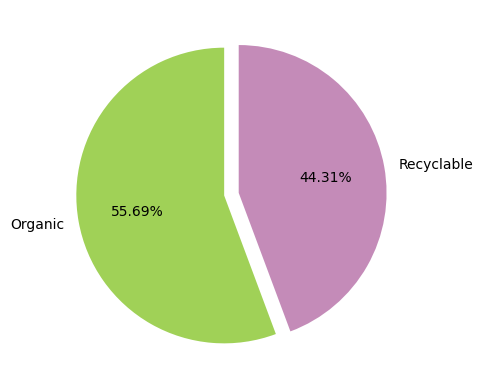

In [7]:
colors = ['#a0d157', '#c48bb8']
plt.pie(data.label.value_counts(), labels=['Organic', 'Recyclable'], autopct='%0.2f%%', colors = colors, startangle= 90, explode=[0.05, 0.05])
plt.show()

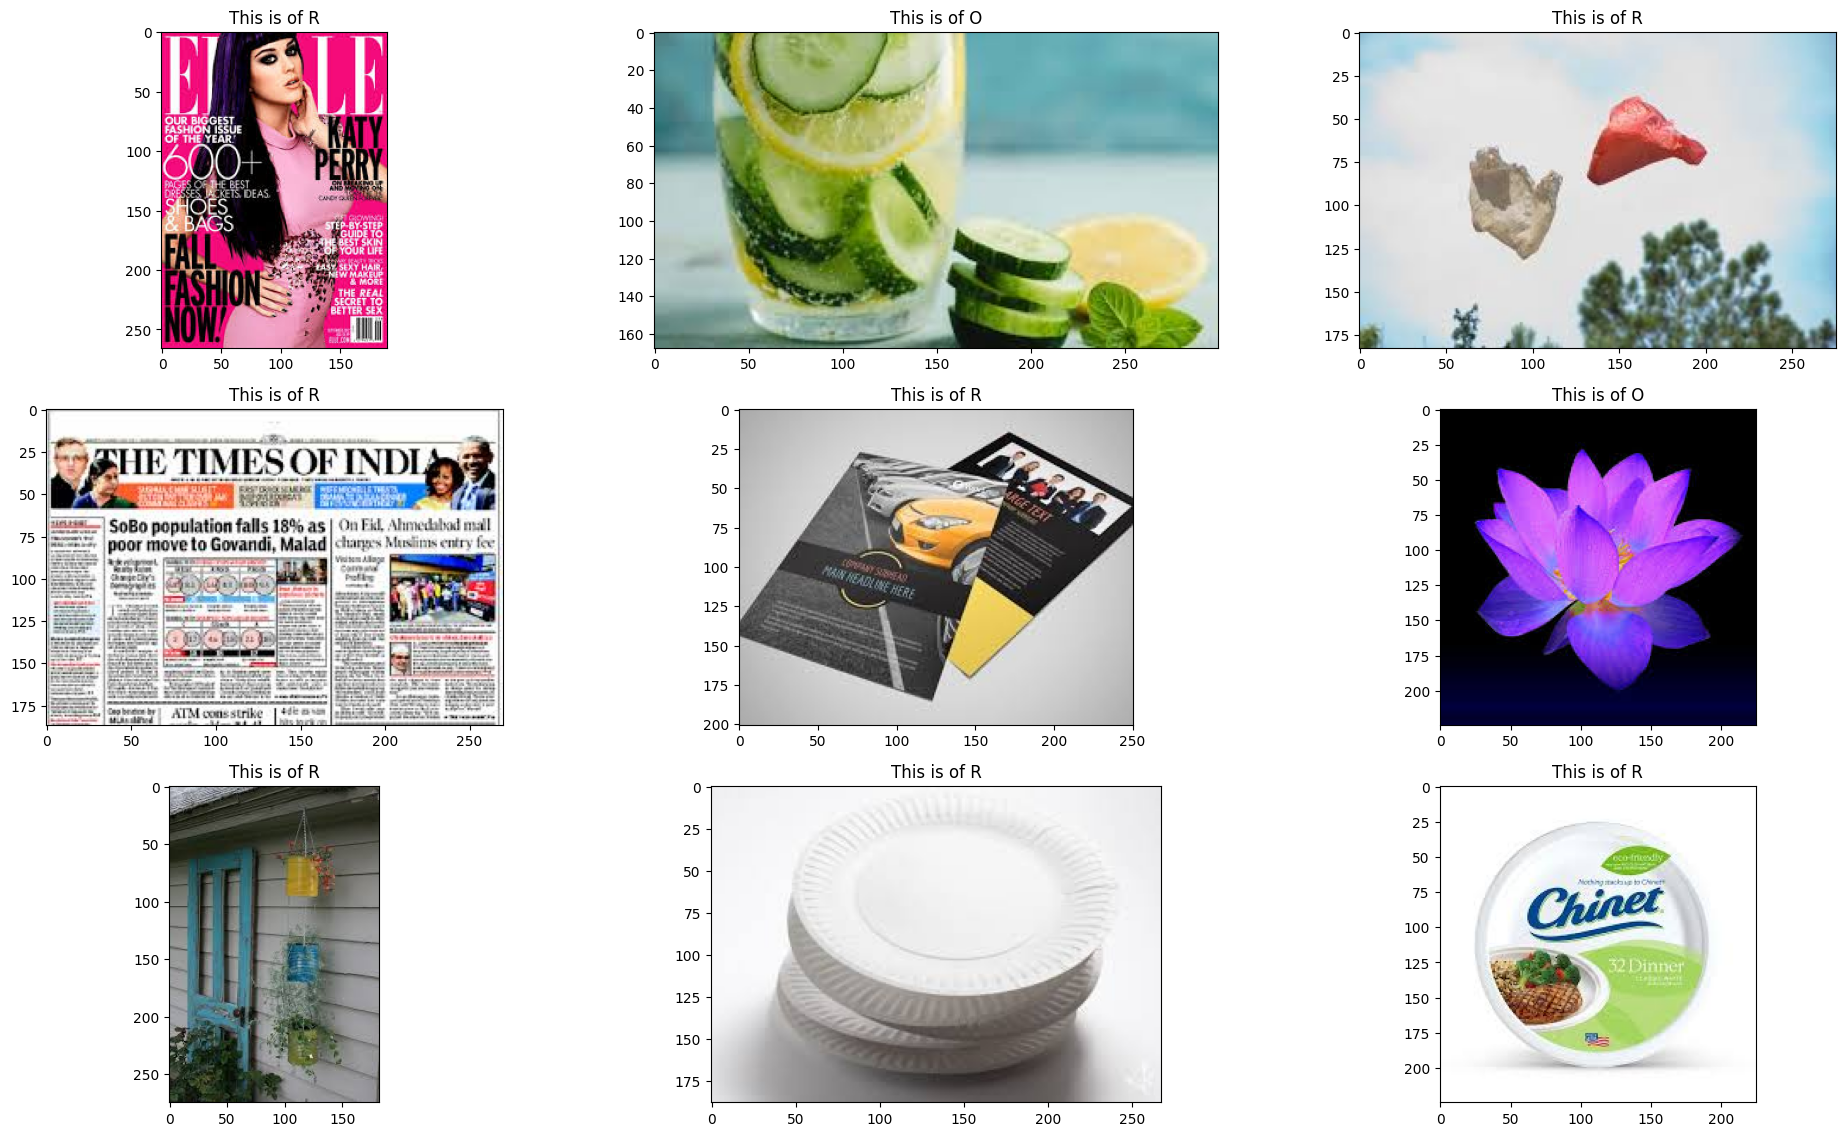

In [8]:
plt.figure(figsize=(20, 15))
for i in range(9):
    plt.subplot(4, 3,(i%12)+1)
    index = np.random.randint(15000)
    plt.title('This is of {0}'.format(data.label[index]))
    plt.imshow(data.image[index])
    plt.tight_layout()

In [9]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape = (224, 224, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

batch_size = 32


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 222, 222, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 109, 109, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 52, 52, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      22,151,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │             130 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 2)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,261,250 (84.92 MB)

 Trainable params: 22,261,250 (84.92 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
)

In [12]:
test_datagen = ImageDataGenerator(
    rescale = 1./255,
)

In [13]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size = (224, 224),
    batch_size = batch_size,
    color_mode = 'rgb',
    class_mode = 'categorical'
)
test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size = (224, 224),
    batch_size = batch_size,
    color_mode = 'rgb',
    class_mode = 'categorical'
)

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [14]:
from tensorflow.keras.callbacks import EarlyStopping

# Define EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=5,          # Number of epochs with no improvement before stopping
    restore_best_weights=True,  # Restore the best model weights
    verbose=1
)

# Train the model with EarlyStopping
hist = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator,
    callbacks=[early_stopping]  # Include EarlyStopping in callbacks
)


Epoch 1/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 62s 76ms/step - accuracy: 0.7508 - loss: 0.5574 - val_accuracy: 0.8567 - val_loss: 0.3777
Epoch 2/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 44s 63ms/step - accuracy: 0.8357 - loss: 0.3992 - val_accuracy: 0.8754 - val_loss: 0.3247
Epoch 3/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 44s 62ms/step - accuracy: 0.8565 - loss: 0.3535 - val_accuracy: 0.8484 - val_loss: 0.3810
Epoch 4/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 42s 60ms/step - accuracy: 0.8820 - loss: 0.3026 - val_accuracy: 0.8826 - val_loss: 0.3220
Epoch 5/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 43s 60ms/step - accuracy: 0.8905 - loss: 0.2790 - val_accuracy: 0.9049 - val_loss: 0.2880
Epoch 6/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 44s 62ms/step - accuracy: 0.9077 - loss: 0.2343 - val_accuracy: 0.9017 - val_loss: 0.2905
Epoch 7/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 43s 61ms/step - accuracy: 0.9323 - loss: 0.1802 - val_accuracy: 0.9045 - val_loss: 0.3152
Epoch 8/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 42s 59ms/step - accuracy: 0.9416 - loss: 0.1516 - 

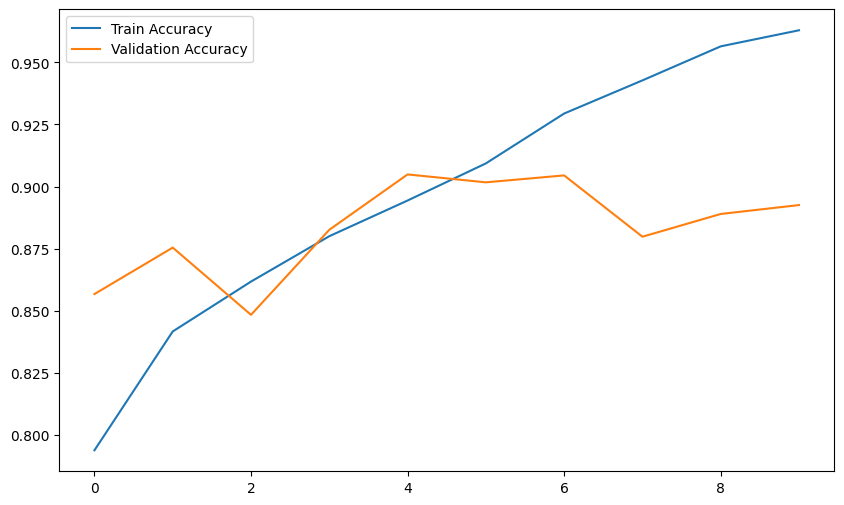

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(hist.history['accuracy'], label='Train Accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

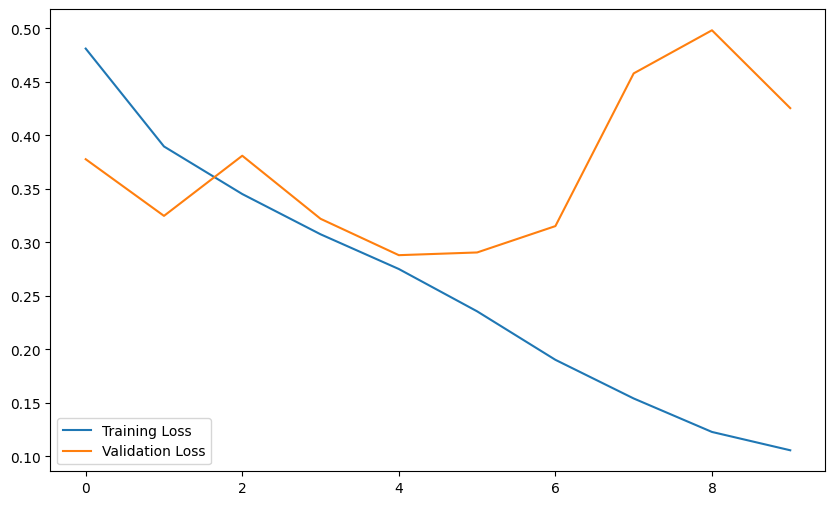

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [26]:

print(train_generator.class_indices)  # Should be {'O': 0, 'R': 1}
print(test_generator.class_indices)   # Should match {'O': 0, 'R': 1}



{'O': 0, 'R': 1}
{'O': 0, 'R': 1}


In [31]:
def predict_fun(img):
    plt.figure(figsize=(6, 4))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.tight_layout()

    # Resize and Normalize
    img = cv2.resize(img, (224, 224))
    img = img / 255.0  # Normalize as done during training

    img = np.reshape(img, [-1, 224, 224, 3])
    result = np.argmax(model.predict(img))

    if result == 1:
        print('This is Organic Waste')
    else:
        print('This is Recyclable Waste')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
This is Organic Waste


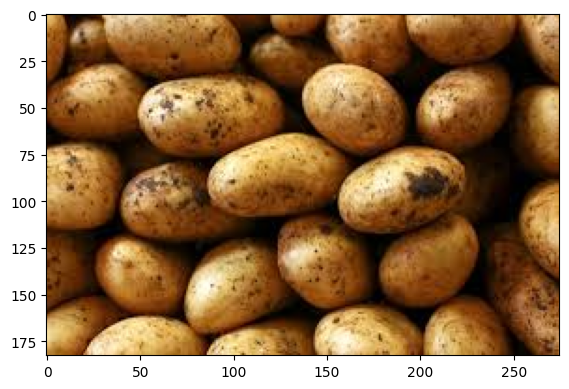

In [32]:
test_img = cv2.imread("/content/O_12823.jpg")
predict_fun(test_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
This is Recyclable Waste


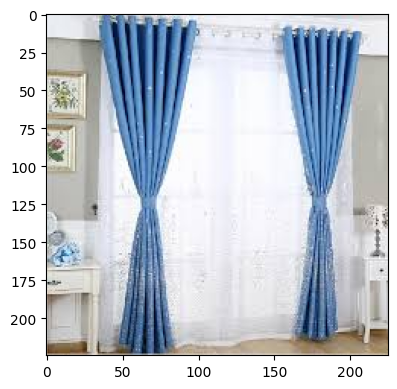

In [33]:
test_img = cv2.imread("/content/R_10001.jpg")
predict_fun(test_img)